In [34]:
from scipy import mgrid,exp
import numpy as np
from numpy.fft import *
from PIL import Image
from skimage import data, io, filters

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def makeGaussianPSF(radius,sizeX,sizeY):
    """ Returns a normalized 2D gauss kernel array for convolutions """   
    x,y = mgrid[-sizeY/2:sizeY/2, -sizeX/2:sizeX/2]
    g = exp(-(x**2/float(radius)+y**2/float(radius)))
    return(g / g.sum())


def convolve(Input, psf, epsilon):
    InputFFT = fftn(Input)
    psfFFT = fftn(psf)+epsilon
    convolved = ifftn(InputFFT*psfFFT)
    convolved = np.abs(convolved)
    return(convolved)


def deconvolve(Input, psf, epsilon):
    InputFFT = fftn(Input)
    psfFFT = fftn(psf)+epsilon
    deconvolved = ifftn(InputFFT/psfFFT)
    deconvolved = np.abs(deconvolved)
    return(deconvolved)



def makeMotionPSF(length,sizeX,sizeY):
    psf = np.zeros((sizeY,sizeX))
    
    r1 = int(sizeY/2)
    r2 = int(sizeY/2+1)
    c1 = int(sizeX/2-length/2)
    c2 = int(sizeX/2+length/2)
    
    print(r1)
    print(r2)
    print(c1)
    print(c2)
    
    psf[r1:r2,c1:c2] = 1
    return(psf/psf.sum())


def exportArrayAsImage(img,fileName):
    img = np.abs(img)
    img = np.where(img > 255, 255, img) 
    img = np.where(img < 0, 0, img) 
    img = img.astype(np.uint8)
    img = Image.fromarray(img)
    img.save(fileName)

    
    


In [46]:
epsilon = 0.00001
r=1000
Input = data.camera()

print(type(Input))
print(Input.shape)


sizeY,sizeX = Input.shape
psf = makeMotionPSF(2,sizeX,sizeY)

#Visualize the PSF
exportArrayAsImage(psf*255.0/psf.max(),'PSF.png')

#Convolve the input
InputConv = np.abs(convolve(Input, psf, epsilon))

#Deconvolve the input
InputDeconv = deconvolve(InputConv, psf, epsilon)

#Visualize the convolved and deconvolved images
exportArrayAsImage(fftshift(InputConv),'Convolved.png')
exportArrayAsImage(InputDeconv,'Deconvolved.png')

<class 'numpy.ndarray'>
(512, 512)
256
257
255
257


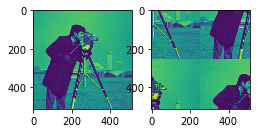

In [47]:
#plotting
plt.subplot(1,3,1)
plt.imshow(Input)

plt.subplot(1,3,2)
plt.imshow(InputConv)



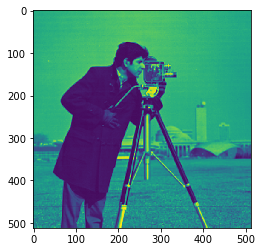

In [48]:
plt.imshow(InputDeconv)

In [51]:
np.sum(psf)

1.0

In [ ]:
plt.imshow()